# Project Uber Data Insight Dashboard


In [11]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Table of Contents

1. [About Dataset](#1-about-dataset)
2. [Exploratory Data Analysis (EDA)](#2-eda)
   - Data Preview
   - Data Types & Missing Values
   - Statistical Summary
   - Duplicates Check
   - Column Overview
3. [Data Visualization](#3-data-visualization)
   - Booking Status Distribution
   - Vehicle Type Distribution
   - Top Pickup Locations
   - Top Drop Locations
   - VTAT & CTAT Distribution
   - Booking Value Distribution
   - Booking Status Pie Chart
4. [Data Cleaning](#4-data-cleaning)
   - Date & Time Processing
   - Reason Column Creation
   - Handling Missing Values
   - Data Type Conversion
   - Saving Cleaned Data


# 1. About Dataset
This comprehensive dataset contains detailed ride-sharing data from Uber operations for the year 2024, providing rich insights into booking patterns, vehicle performance, revenue streams, cancellation behaviors, and customer satisfaction metrics.

# 2. EDA

In [12]:
df=pd.read_csv("ncr_ride_bookings.csv")
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [14]:
# Number of rows and columns
df.shape

(150000, 21)

In [15]:
# type of each column
df.dtypes

Date                                  object
Time                                  object
Booking ID                            object
Booking Status                        object
Customer ID                           object
Vehicle Type                          object
Pickup Location                       object
Drop Location                         object
Avg VTAT                             float64
Avg CTAT                             float64
Cancelled Rides by Customer          float64
Reason for cancelling by Customer     object
Cancelled Rides by Driver            float64
Driver Cancellation Reason            object
Incomplete Rides                     float64
Incomplete Rides Reason               object
Booking Value                        float64
Ride Distance                        float64
Driver Ratings                       float64
Customer Rating                      float64
Payment Method                        object
dtype: object

In [16]:
# find Nan values
df.isna().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [17]:
# statistical summary of numerical columns
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [18]:
# medium of numerical columns
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.median()


Avg VTAT                         8.30
Avg CTAT                        28.80
Cancelled Rides by Customer      1.00
Cancelled Rides by Driver        1.00
Incomplete Rides                 1.00
Booking Value                  414.00
Ride Distance                   23.72
Driver Ratings                   4.30
Customer Rating                  4.50
dtype: float64

In [19]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [20]:

df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

# 3. Data Visualization

Text(0.5, 0, 'Booking Status')

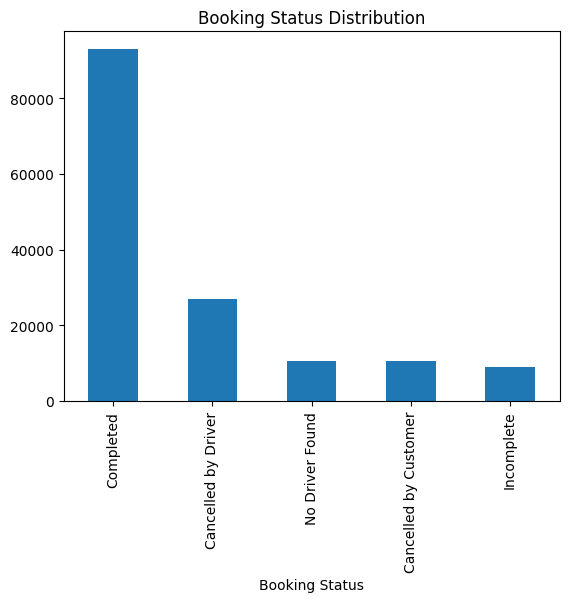

In [28]:
#Booking Status Distribution
df['Booking Status'].value_counts().plot(kind='bar') 
plt.title('Booking Status Distribution')
plt.xlabel('Booking Status')

C:\Users\Mua\AppData\Local\Temp\ipykernel_17488\589974744.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vehicle Type', data=df, palette='Set3')


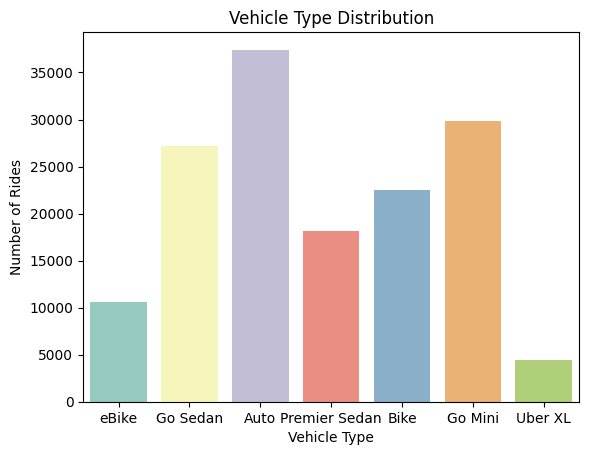

In [22]:

# Vehicle Type Distribution
plt.figure()
sns.countplot(x='Vehicle Type', data=df, palette='Set3')
plt.title("Vehicle Type Distribution")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Rides")
plt.show()


C:\Users\Mua\AppData\Local\Temp\ipykernel_17488\3595363401.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pickups.index, y=top_pickups.values, palette='Blues_r')


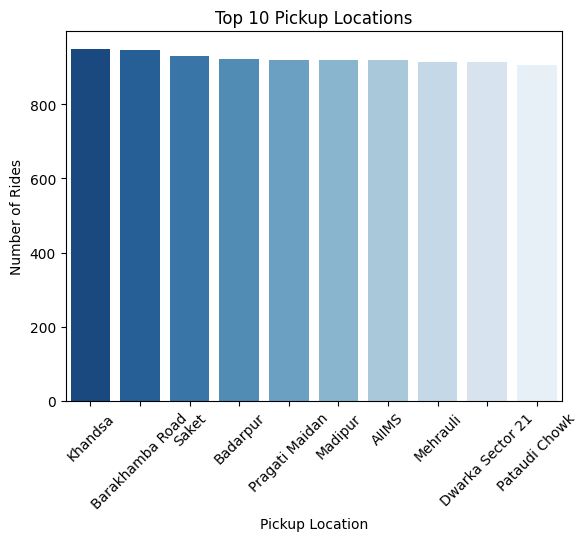

In [23]:

# Top 10 Pickup Locations
top_pickups = df['Pickup Location'].value_counts().head(10)
plt.figure()
sns.barplot(x=top_pickups.index, y=top_pickups.values, palette='Blues_r')
plt.title("Top 10 Pickup Locations")
plt.xticks(rotation=45)
plt.ylabel("Number of Rides")
plt.show()

C:\Users\Mua\AppData\Local\Temp\ipykernel_17488\758890326.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drops.index, y=top_drops.values, palette='Greens_r')


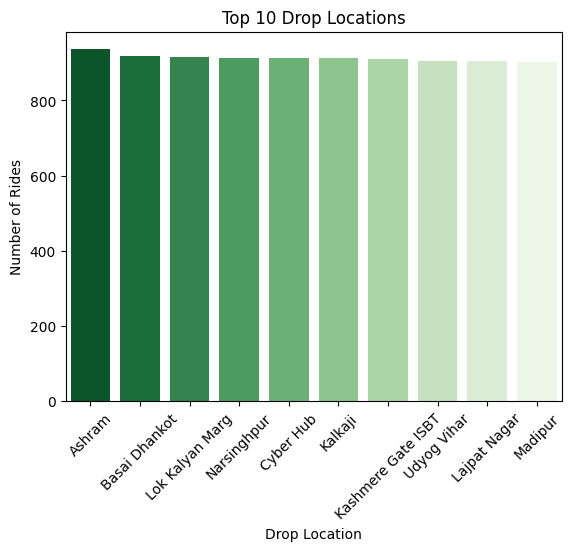

In [24]:
# Top 10 Drop Locations
top_drops = df['Drop Location'].value_counts().head(10)
plt.figure()
sns.barplot(x=top_drops.index, y=top_drops.values, palette='Greens_r')
plt.title("Top 10 Drop Locations")
plt.xticks(rotation=45)
plt.ylabel("Number of Rides")
plt.show()

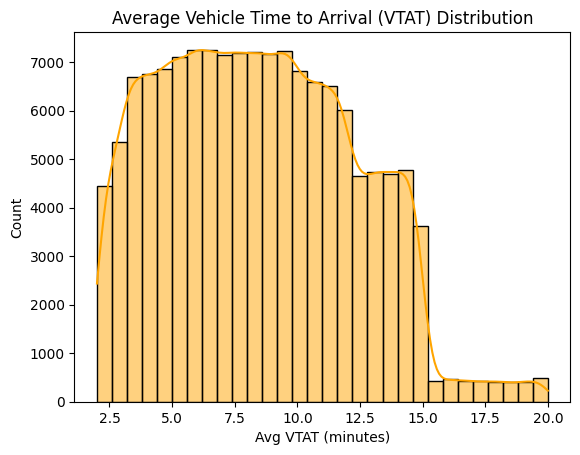

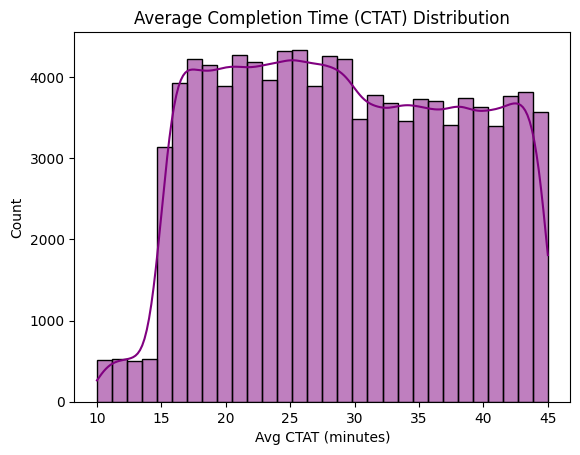

In [25]:

#Avg VTAT & CTAT Distribution

# VTAT
plt.figure()
sns.histplot(df['Avg VTAT'], bins=30, kde=True, color='orange')
plt.title("Average Vehicle Time to Arrival (VTAT) Distribution")
plt.xlabel("Avg VTAT (minutes)")
plt.show()

# CTAT
plt.figure()
sns.histplot(df['Avg CTAT'], bins=30, kde=True, color='purple')
plt.title("Average Completion Time (CTAT) Distribution")
plt.xlabel("Avg CTAT (minutes)")
plt.show()

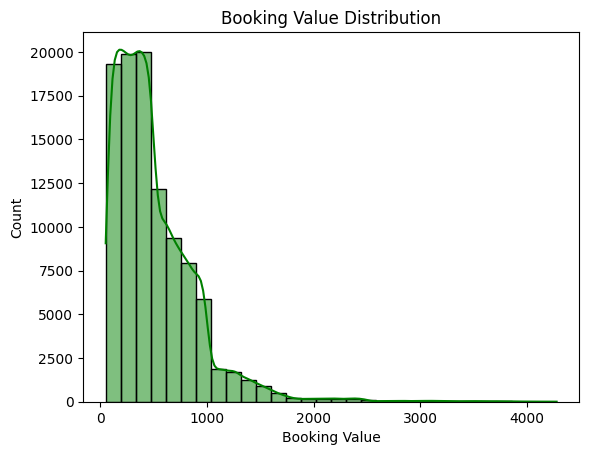

In [26]:
# Booking Value Distribution

plt.figure()
sns.histplot(df['Booking Value'], bins=30, kde=True, color='green')
plt.title("Booking Value Distribution")
plt.xlabel("Booking Value")
plt.show()

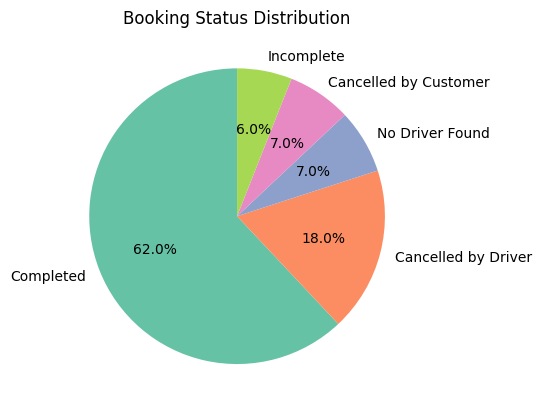

In [27]:
# Pie chart for Booking Status
plt.figure()
df['Booking Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Booking Status Distribution')
plt.ylabel('')
plt.show()

C:\Users\Mua\AppData\Local\Temp\ipykernel_17488\1333114663.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment Method', data=df, palette='pastel', order=df['Payment Method'].value_counts().index)


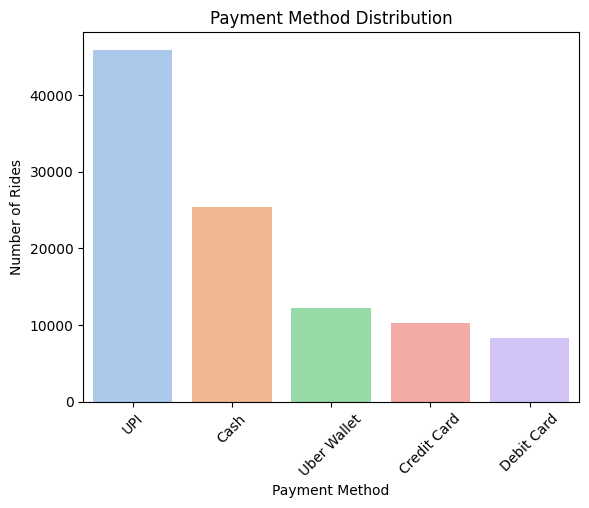

In [ ]:
# Distribution of Payment Methods
plt.figure()
sns.countplot(x='Payment Method', data=df, palette='pastel', order=df['Payment Method'].value_counts().index)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()


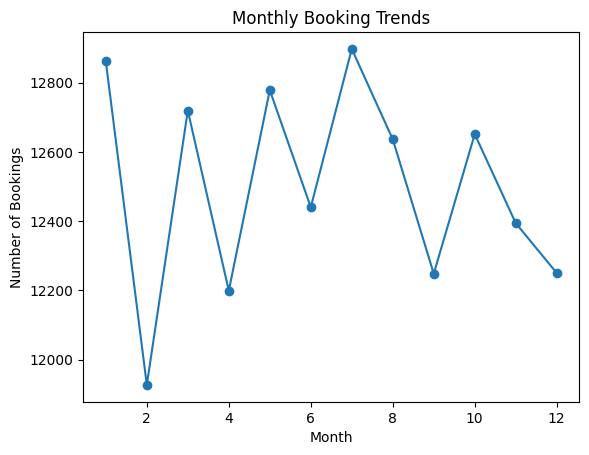

In [ ]:
# Monthly Booking Trends
plt.figure()
df['Month'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

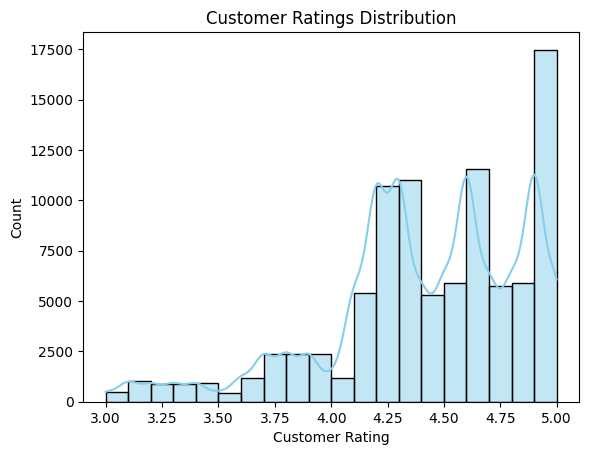

In [ ]:
# Customer Ratings Distribution
plt.figure()
sns.histplot(df['Customer Rating'], bins=20, kde=True, color='skyblue')
plt.title('Customer Ratings Distribution')
plt.xlabel('Customer Rating')
plt.show()

# 4. Data Cleaning


In [31]:
# first lets covert the date  and time columns to datetime format to make it easier to work with them
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
# next combine the date and time columns into a single datetime column
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df.drop(columns=['Date', 'Time'], inplace=True)
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['DayOfWeek'] = df['DateTime'].dt.dayofweek # Monday=0, Sunday=6
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]) # Saturday and Sunday


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Booking ID                         150000 non-null  object        
 1   Booking Status                     150000 non-null  object        
 2   Customer ID                        150000 non-null  object        
 3   Vehicle Type                       150000 non-null  object        
 4   Pickup Location                    150000 non-null  object        
 5   Drop Location                      150000 non-null  object        
 6   Avg VTAT                           139500 non-null  float64       
 7   Avg CTAT                           102000 non-null  float64       
 8   Cancelled Rides by Customer        10500 non-null   float64       
 9   Reason for cancelling by Customer  10500 non-null   object        
 10  Cancelled Rides by D

In [44]:
df.head()


,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,...,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,DateTime,Year,Month,DayOfWeek,IsWeekend
0,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2024-03-23 12:29:38,2024,3,5,True
1,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,...,237.0,5.73,NaN,NaN,UPI,2024-11-29 18:01:39,2024,11,4,False
2,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,...,627.0,13.58,4.9,4.9,Debit Card,2024-08-23 08:56:10,2024,8,4,False
3,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,...,416.0,34.02,4.6,5.0,UPI,2024-10-21 17:17:25,2024,10,0,False
4,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,...,737.0,48.21,4.1,4.3,UPI,2024-09-16 22:08:00,2024,9,0,False


In [45]:
# chnage value for DayOfWeek to make it more readable
df['DayOfWeek'] = df['DayOfWeek'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

In [46]:
df.head()

,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,...,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,DateTime,Year,Month,DayOfWeek,IsWeekend
0,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2024-03-23 12:29:38,2024,3,Saturday,True
1,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,...,237.0,5.73,NaN,NaN,UPI,2024-11-29 18:01:39,2024,11,Friday,False
2,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,...,627.0,13.58,4.9,4.9,Debit Card,2024-08-23 08:56:10,2024,8,Friday,False
3,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,...,416.0,34.02,4.6,5.0,UPI,2024-10-21 17:17:25,2024,10,Monday,False
4,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,...,737.0,48.21,4.1,4.3,UPI,2024-09-16 22:08:00,2024,9,Monday,False


In [48]:
# Create Reason column
df["Reason"] = "Unknown"

df.loc[df["Booking Status"] == "Completed", "Reason"] = "Order Completed"
df.loc[df["Booking Status"] == "Cancelled by Customer", "Reason"] = df["Reason for cancelling by Customer"]
df.loc[df["Booking Status"] == "Cancelled by Driver", "Reason"] = df["Driver Cancellation Reason"]
df.loc[df["Booking Status"] == "Incomplete", "Reason"] = df["Incomplete Rides Reason"]

# Drop old columns
df = df.drop(columns=[
    "Cancelled Rides by Customer", 
    "Reason for cancelling by Customer", 
    "Cancelled Rides by Driver", 
    "Driver Cancellation Reason", 
    "Incomplete Rides", 
    "Incomplete Rides Reason"
])


In [49]:
# check the number of Cancelled by Customer in booking satatus
df.head()

,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,DateTime,Year,Month,DayOfWeek,IsWeekend,Reason
0,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-23 12:29:38,2024,3,Saturday,True,Unknown
1,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,237.0,5.73,NaN,NaN,UPI,2024-11-29 18:01:39,2024,11,Friday,False,Vehicle Breakdown
2,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,627.0,13.58,4.9,4.9,Debit Card,2024-08-23 08:56:10,2024,8,Friday,False,Order Completed
3,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,416.0,34.02,4.6,5.0,UPI,2024-10-21 17:17:25,2024,10,Monday,False,Order Completed
4,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,737.0,48.21,4.1,4.3,UPI,2024-09-16 22:08:00,2024,9,Monday,False,Order Completed


In [50]:
# count null in Reason for cancelling by Customer
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Booking ID       150000 non-null  object        
 1   Booking Status   150000 non-null  object        
 2   Customer ID      150000 non-null  object        
 3   Vehicle Type     150000 non-null  object        
 4   Pickup Location  150000 non-null  object        
 5   Drop Location    150000 non-null  object        
 6   Avg VTAT         139500 non-null  float64       
 7   Avg CTAT         102000 non-null  float64       
 8   Booking Value    102000 non-null  float64       
 9   Ride Distance    102000 non-null  float64       
 10  Driver Ratings   93000 non-null   float64       
 11  Customer Rating  93000 non-null   float64       
 12  Payment Method   102000 non-null  object        
 13  DateTime         150000 non-null  datetime64[ns]
 14  Year             150

In [51]:
df["Driver Ratings"].isna().sum()

np.int64(57000)

In [52]:
# change the null values in Driver Ratings and Customer Ratings to -1"
df["Driver Ratings"].fillna(-1, inplace=True)
df["Customer Rating"].fillna(-1, inplace=True)

C:\Users\Mua\AppData\Local\Temp\ipykernel_20324\3170428072.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Driver Ratings"].fillna(-1, inplace=True)
C:\Users\Mua\AppData\Local\Temp\ipykernel_20324\3170428072.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [53]:
df.head()

,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,DateTime,Year,Month,DayOfWeek,IsWeekend,Reason
0,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,2024-03-23 12:29:38,2024,3,Saturday,True,Unknown
1,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,237.0,5.73,-1.0,-1.0,UPI,2024-11-29 18:01:39,2024,11,Friday,False,Vehicle Breakdown
2,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,627.0,13.58,4.9,4.9,Debit Card,2024-08-23 08:56:10,2024,8,Friday,False,Order Completed
3,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,416.0,34.02,4.6,5.0,UPI,2024-10-21 17:17:25,2024,10,Monday,False,Order Completed
4,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,737.0,48.21,4.1,4.3,UPI,2024-09-16 22:08:00,2024,9,Monday,False,Order Completed


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Booking ID       150000 non-null  object        
 1   Booking Status   150000 non-null  object        
 2   Customer ID      150000 non-null  object        
 3   Vehicle Type     150000 non-null  object        
 4   Pickup Location  150000 non-null  object        
 5   Drop Location    150000 non-null  object        
 6   Avg VTAT         139500 non-null  float64       
 7   Avg CTAT         102000 non-null  float64       
 8   Booking Value    102000 non-null  float64       
 9   Ride Distance    102000 non-null  float64       
 10  Driver Ratings   150000 non-null  float64       
 11  Customer Rating  150000 non-null  float64       
 12  Payment Method   102000 non-null  object        
 13  DateTime         150000 non-null  datetime64[ns]
 14  Year             150

In [55]:
# change type of Driver Ratings and Customer Rating to float
df["Driver Ratings"] = df["Driver Ratings"].astype(float)
df["Customer Rating"] = df["Customer Rating"].astype(float)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Booking ID       150000 non-null  object        
 1   Booking Status   150000 non-null  object        
 2   Customer ID      150000 non-null  object        
 3   Vehicle Type     150000 non-null  object        
 4   Pickup Location  150000 non-null  object        
 5   Drop Location    150000 non-null  object        
 6   Avg VTAT         139500 non-null  float64       
 7   Avg CTAT         102000 non-null  float64       
 8   Booking Value    102000 non-null  float64       
 9   Ride Distance    102000 non-null  float64       
 10  Driver Ratings   150000 non-null  float64       
 11  Customer Rating  150000 non-null  float64       
 12  Payment Method   102000 non-null  object        
 13  DateTime         150000 non-null  datetime64[ns]
 14  Year             150

In [57]:
# save the cleaned data
df.to_csv("cleaned_uber.csv", index=False)

In [59]:
# Fill missing values in numerical columns with median
df['Avg VTAT'] = df['Avg VTAT'].fillna(df['Avg VTAT'].median())
df['Avg CTAT'] = df['Avg CTAT'].fillna(df['Avg CTAT'].median())
df['Booking Value'] = df['Booking Value'].fillna(df['Booking Value'].median())
df['Ride Distance'] = df['Ride Distance'].fillna(df['Ride Distance'].median())

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Booking ID       150000 non-null  object        
 1   Booking Status   150000 non-null  object        
 2   Customer ID      150000 non-null  object        
 3   Vehicle Type     150000 non-null  object        
 4   Pickup Location  150000 non-null  object        
 5   Drop Location    150000 non-null  object        
 6   Avg VTAT         150000 non-null  float64       
 7   Avg CTAT         150000 non-null  float64       
 8   Booking Value    150000 non-null  float64       
 9   Ride Distance    150000 non-null  float64       
 10  Driver Ratings   150000 non-null  float64       
 11  Customer Rating  150000 non-null  float64       
 12  Payment Method   102000 non-null  object        
 13  DateTime         150000 non-null  datetime64[ns]
 14  Year             150

In [30]:
df.head()

,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,DateTime,Year,Month,DayOfWeek,IsWeekend,Reason
0,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.3,28.8,414.0,23.72,-1.0,-1.0,NaN,2024-03-23 12:29:38,2024,3,Saturday,True,Unknown
1,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,237.0,5.73,-1.0,-1.0,UPI,2024-11-29 18:01:39,2024,11,Friday,False,Vehicle Breakdown
2,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,627.0,13.58,4.9,4.9,Debit Card,2024-08-23 08:56:10,2024,8,Friday,False,Order Completed
3,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,416.0,34.02,4.6,5.0,UPI,2024-10-21 17:17:25,2024,10,Monday,False,Order Completed
4,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,737.0,48.21,4.1,4.3,UPI,2024-09-16 22:08:00,2024,9,Monday,False,Order Completed
